In [2]:
from numpy.random import seed
seed(1)

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [136]:
data = pd.read_csv("D:/sem_4_project_material/twitter_dataset.csv",encoding="latin-1",names= ["target","id","date","flag","user","text"])

In [137]:
data.shape

(1600000, 6)

In [138]:
data.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [139]:
# remove columns which is not required
data=data.drop(['id', 'date', 'flag', 'user'], axis=1)

In [140]:
data.head()

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [141]:
data.isnull().sum()

target    0
text      0
dtype: int64

In [142]:
data["target"].value_counts()

4    800000
0    800000
Name: target, dtype: int64

In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   text    1600000 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [144]:
data["target"]=data["target"].map(lambda x : 1 if x == 4 else 0 )

In [145]:
data.target.value_counts()

1    800000
0    800000
Name: target, dtype: int64

In [146]:
data["clean_text"] = data["text"].map( lambda  text : text.lower())

In [147]:
data.head()

,target,text,clean_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","@switchfoot http://twitpic.com/2y1zl - awww, t..."
1,0,is upset that he can't update his Facebook by ...,is upset that he can't update his facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...,@kenichan i dived many times for the ball. man...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....","@nationwideclass no, it's not behaving at all...."


In [148]:
pattern = "[@#][\w_-]+"
data["clean_text"] = data["clean_text"].map(lambda text : re.sub(pattern,"",text))

In [149]:
data

,target,text,clean_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","http://twitpic.com/2y1zl - awww, that's a bum..."
1,0,is upset that he can't update his Facebook by ...,is upset that he can't update his facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball. managed to s...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....","no, it's not behaving at all. i'm mad. why am..."
...,...,...,...
1599995,1,Just woke up. Having no school is the best fee...,just woke up. having no school is the best fee...
1599996,1,TheWDB.com - Very cool to hear old Walt interv...,thewdb.com - very cool to hear old walt interv...
1599997,1,Are you ready for your MoJo Makeover? Ask me f...,are you ready for your mojo makeover? ask me f...
1599998,1,Happy 38th Birthday to my boo of alll time!!! ...,happy 38th birthday to my boo of alll time!!! ...


In [150]:
pattern = r"https?:\/\/[A-Za-z0-9]+.[A-za-z0-9]+\/\w+"
data["clean_text"] = data["clean_text"].map(lambda text : re.sub(pattern,"",text))

In [151]:
data.head()

,target,text,clean_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","- awww, that's a bummer. you shoulda got da..."
1,0,is upset that he can't update his Facebook by ...,is upset that he can't update his facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball. managed to s...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....","no, it's not behaving at all. i'm mad. why am..."


In [152]:
contractions = {
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he shall",
"he'll've": "he shall have",
"he's": "he has",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has",
"i'd": "I had",
"i'd've": "I would have",
"i'll": "I shall",
"i'll've": "I shall have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had",
"it'd've": "it would have",
"it'll": "it shall",
"it'll've": "it shall have",
"it's": "it has",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had",
"she'd've": "she would have",
"she'll": "she shall",
"she'll've": "she shall have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that has",
"there'd": "there had",
"there'd've": "there would have",
"there's": "there has",
"they'd": "they had",
"they'd've": "they would have",
"they'll": "they shall",
"they'll've": "they shall have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall",
"what'll've": "what shall have",
"what're": "what are",
"what's": "what has",
"what've": "what have",
"when's": "when has",
"when've": "when have",
"where'd": "where did",
"where's": "where has",
"where've": "where have",
"who'll": "who shall",
"who'll've": "who shall have",
"who's": "who has",
"who've": "who have",
"why's": "why has",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had",
"you'd've": "you would have",
"you'll": "you shall",
"you'll've": "you shall have",
"you're": "you are",
"you've": "you have"
}

In [153]:
def change(text):
    for word in text.split(" "):
        if word in contractions:
            text = text.replace(word, contractions[word])
    return text

In [154]:
data["clean_text"] = data["clean_text"].map(change)

In [155]:
data.head()

,target,text,clean_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","- awww, that has a bummer. you shoulda got ..."
1,0,is upset that he can't update his Facebook by ...,is upset that he cannot update his facebook by...
2,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball. managed to s...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....","no, it has not behaving at all. I am mad. why..."


In [156]:
from string import punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [157]:
def remove_punc(text):
    return text.translate(str.maketrans('', '',punctuation))

In [158]:
data["clean_text"] = data["clean_text"].map(remove_punc)

In [159]:
data

,target,text,clean_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww that has a bummer you shoulda got dav...
1,0,is upset that he can't update his Facebook by ...,is upset that he cannot update his facebook by...
2,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sa...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....",no it has not behaving at all I am mad why am...
...,...,...,...
1599995,1,Just woke up. Having no school is the best fee...,just woke up having no school is the best feel...
1599996,1,TheWDB.com - Very cool to hear old Walt interv...,thewdbcom very cool to hear old walt intervie...
1599997,1,Are you ready for your MoJo Makeover? Ask me f...,are you ready for your mojo makeover ask me fo...
1599998,1,Happy 38th Birthday to my boo of alll time!!! ...,happy 38th birthday to my boo of alll time tup...


In [160]:
data['clean_text'] = data['clean_text'].apply(lambda x: x.strip())

In [161]:
data

,target,text,clean_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww that has a bummer you shoulda got david ...
1,0,is upset that he can't update his Facebook by ...,is upset that he cannot update his facebook by...
2,0,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sav...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....",no it has not behaving at all I am mad why am ...
...,...,...,...
1599995,1,Just woke up. Having no school is the best fee...,just woke up having no school is the best feel...
1599996,1,TheWDB.com - Very cool to hear old Walt interv...,thewdbcom very cool to hear old walt intervie...
1599997,1,Are you ready for your MoJo Makeover? Ask me f...,are you ready for your mojo makeover ask me fo...
1599998,1,Happy 38th Birthday to my boo of alll time!!! ...,happy 38th birthday to my boo of alll time tup...


In [162]:
data.loc[0]['text']

"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [163]:
data.loc[0]['clean_text']

'awww that has a bummer  you shoulda got david carr of third day to do it d'

In [164]:
data.drop("text",axis=1,inplace=True)

In [165]:
def remove_empty_string(text):
    if text == '':
        return 1
    else:
        return text

In [166]:
data['clean_text']=data['clean_text'].apply(remove_empty_string)

In [167]:
data

,target,clean_text
0,0,awww that has a bummer you shoulda got david ...
1,0,is upset that he cannot update his facebook by...
2,0,i dived many times for the ball managed to sav...
3,0,my whole body feels itchy and like its on fire
4,0,no it has not behaving at all I am mad why am ...
...,...,...
1599995,1,just woke up having no school is the best feel...
1599996,1,thewdbcom very cool to hear old walt intervie...
1599997,1,are you ready for your mojo makeover ask me fo...
1599998,1,happy 38th birthday to my boo of alll time tup...


In [170]:
data = data[data['clean_text']!=1]

In [174]:
data.reset_index(inplace=True, drop=True)

In [178]:
data.to_csv("D:/sem_4_project_material/cleaned_text.csv", index=False)

In [177]:
data

,target,clean_text
0,0,awww that has a bummer you shoulda got david ...
1,0,is upset that he cannot update his facebook by...
2,0,i dived many times for the ball managed to sav...
3,0,my whole body feels itchy and like its on fire
4,0,no it has not behaving at all I am mad why am ...
...,...,...
1596581,1,just woke up having no school is the best feel...
1596582,1,thewdbcom very cool to hear old walt intervie...
1596583,1,are you ready for your mojo makeover ask me fo...
1596584,1,happy 38th birthday to my boo of alll time tup...


In [4]:
data=pd.read_csv("D:/sem_4_project_material/cleaned_text.csv")

In [5]:
data

,target,clean_text
0,0,awww that has a bummer you shoulda got david ...
1,0,is upset that he cannot update his facebook by...
2,0,i dived many times for the ball managed to sav...
3,0,my whole body feels itchy and like its on fire
4,0,no it has not behaving at all I am mad why am ...
...,...,...
1596581,1,just woke up having no school is the best feel...
1596582,1,thewdbcom very cool to hear old walt intervie...
1596583,1,are you ready for your mojo makeover ask me fo...
1596584,1,happy 38th birthday to my boo of alll time tup...


In [6]:
data.isnull().sum()

target        0
clean_text    0
dtype: int64

In [7]:
X = data["clean_text"]
y = data["target"]

## Model Building


In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
X_train,X_cv,y_train,y_cv=train_test_split(X_train,y_train,test_size=0.3)

In [9]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape,X_cv.shape,y_cv.shape

((782327,), (478976,), (782327,), (478976,), (335283,), (335283,))

In [10]:
vectorizer = CountVectorizer(stop_words= "english", max_features=15000)
vectorizer.fit(X_train)
X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)
X_cv_vec = vectorizer.transform(X_cv)

In [11]:
pd.DataFrame(X_train_vec[0:10].toarray(), columns=vectorizer.get_feature_names())

,00,01,02,03,04,05,06,07,08,09,...,ð½ñ,ð¾,ð¾ð,ð¾ñ,ð¾ññ,ðð,ñð,ññ,øªù,ø¹ù
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
X_train_vec.shape,X_test_vec.shape,X_cv_vec.shape

((782327, 15000), (478976, 15000), (335283, 15000))

In [13]:
alphas = [0.001,0.01,0.1,0.5,1,5,10,100]
train_scores = list()
cv_scores = list()
for a in alphas:
    model = MultinomialNB(alpha=a)
    model.fit(X_train_vec,y_train)
    train_scores.append(model.score(X_train_vec,y_train))
    cv_scores.append(model.score(X_cv_vec,y_cv))

In [14]:
train_scores,cv_scores

([0.767190701586421,
  0.7671881451106762,
  0.7671855886349315,
  0.7671587456396111,
  0.7671817539213143,
  0.7667599354234227,
  0.7661847283808433,
  0.7584079291651701],
 [0.7607364524893896,
  0.7607424175994607,
  0.7607304873793184,
  0.7608229465854218,
  0.7608647023559202,
  0.7611569927494087,
  0.7611629578594798,
  0.7560001550928619])

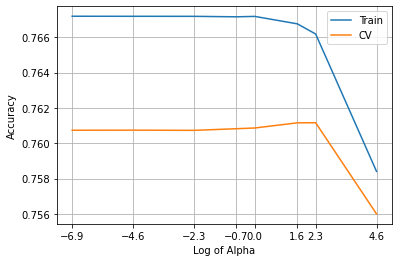

In [15]:
plt.plot(np.log(alphas),train_scores,label= "Train")
plt.plot(np.log(alphas),cv_scores,label="CV")
plt.grid(True)
plt.xticks(np.log(alphas))
plt.legend()
plt.xlabel("Log of Alpha")
plt.ylabel("Accuracy")
plt.show()

In [16]:
alphas

[0.001, 0.01, 0.1, 0.5, 1, 5, 10, 100]

In [17]:
cv_scores

[0.7607364524893896,
 0.7607424175994607,
 0.7607304873793184,
 0.7608229465854218,
 0.7608647023559202,
 0.7611569927494087,
 0.7611629578594798,
 0.7560001550928619]

In [18]:
index_of_best_score = np.argmax(cv_scores)

In [19]:
best_alpha = alphas[index_of_best_score]

In [20]:
best_alpha

10

In [21]:
model = MultinomialNB(alpha = best_alpha)
model.fit(X_train_vec,y_train)
model.score(X_test_vec,y_test)

0.7603032302244789

In [22]:
print("training score: ",model.score(X_train_vec,y_train))
print("validation score:",model.score(X_cv_vec,y_cv))
print("testing score:",model.score(X_test_vec,y_test))

training score:  0.7661847283808433
validation score: 0.7611629578594798
testing score: 0.7603032302244789


In [23]:
confusion_matrix(model.predict(X_train_vec),y_train)

array([[297697,  89617],
       [ 93303, 301710]], dtype=int64)

In [24]:
print(classification_report(model.predict(X_train_vec),y_train))

              precision    recall  f1-score   support

           0       0.76      0.77      0.76    387314
           1       0.77      0.76      0.77    395013

    accuracy                           0.77    782327
   macro avg       0.77      0.77      0.77    782327
weighted avg       0.77      0.77      0.77    782327



In [25]:
confusion_matrix(model.predict(X_cv_vec),y_cv)

array([[127145,  39333],
       [ 40745, 128060]], dtype=int64)

In [26]:
print(classification_report(model.predict(X_cv_vec),y_cv))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76    166478
           1       0.77      0.76      0.76    168805

    accuracy                           0.76    335283
   macro avg       0.76      0.76      0.76    335283
weighted avg       0.76      0.76      0.76    335283



In [27]:
confusion_matrix(model.predict(X_test_vec),y_test)

array([[181101,  56434],
       [ 58375, 183066]], dtype=int64)

In [28]:
print(classification_report(model.predict(X_test_vec),y_test))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76    237535
           1       0.76      0.76      0.76    241441

    accuracy                           0.76    478976
   macro avg       0.76      0.76      0.76    478976
weighted avg       0.76      0.76      0.76    478976



In [29]:
col=["train","CV","test"]
index=[]
train=[]
cv=[]
test=[]


In [30]:
index.append("count_multi")
train.append(model.score(X_train_vec,y_train))
cv.append(model.score(X_cv_vec,y_cv))
test.append(model.score(X_test_vec,y_test))

In [31]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_vec,y_train)
lr.score(X_train_vec,y_train)
lr.score(X_cv_vec,y_cv)

0.7671191202655667

In [32]:
print("training score: ",lr.score(X_train_vec,y_train))
print("validation score:",lr.score(X_cv_vec,y_cv))
print("testing score:",lr.score(X_test_vec,y_test))

training score:  0.7784570901937425
validation score: 0.7671191202655667
testing score: 0.7673724779529664


In [33]:
confusion_matrix(lr.predict(X_train_vec),y_train)

array([[292470,  74789],
       [ 98530, 316538]], dtype=int64)

In [34]:
print(classification_report(lr.predict(X_train_vec),y_train))

              precision    recall  f1-score   support

           0       0.75      0.80      0.77    367259
           1       0.81      0.76      0.79    415068

    accuracy                           0.78    782327
   macro avg       0.78      0.78      0.78    782327
weighted avg       0.78      0.78      0.78    782327



In [35]:
confusion_matrix(lr.predict(X_cv_vec),y_cv)

array([[123705,  33896],
       [ 44185, 133497]], dtype=int64)

In [36]:
print(classification_report(lr.predict(X_cv_vec),y_cv))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76    157601
           1       0.80      0.75      0.77    177682

    accuracy                           0.77    335283
   macro avg       0.77      0.77      0.77    335283
weighted avg       0.77      0.77      0.77    335283



In [37]:
confusion_matrix(lr.predict(X_test_vec),y_test)

array([[176518,  48465],
       [ 62958, 191035]], dtype=int64)

In [38]:
print(classification_report(lr.predict(X_test_vec),y_test))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76    224983
           1       0.80      0.75      0.77    253993

    accuracy                           0.77    478976
   macro avg       0.77      0.77      0.77    478976
weighted avg       0.77      0.77      0.77    478976



In [39]:
index.append("count_LR")
train.append(lr.score(X_train_vec,y_train))
cv.append(lr.score(X_cv_vec,y_cv))
test.append(lr.score(X_test_vec,y_test))

### Transforming using tf-idf

In [40]:
tf_idf=TfidfVectorizer(max_features=20000)
x_train_tf_idf = tf_idf.fit_transform(X_train)

In [41]:
x_test_tf_idf = tf_idf.transform(X_test)

In [42]:
x_cv_tf_idf = tf_idf.transform(X_cv)

In [43]:
x_train_tf_idf.shape,x_test_tf_idf.shape,x_cv_tf_idf.shape

((782327, 20000), (478976, 20000), (335283, 20000))

In [44]:
alphas=[0,0.5,1,5,10,20,50,100]
cv_scores=[]
train_scores=[]
for a in alphas:
    model=MultinomialNB(alpha=a)
    model.fit(x_train_tf_idf,y_train)
    train_scores.append(model.score(x_train_tf_idf,y_train))
    cv_scores.append(model.score(x_cv_tf_idf,y_cv))
print(cv_scores,train_scores)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


[0.771333470530865, 0.772168585940832, 0.7728068527184497, 0.7757536170936195, 0.7769376914427514, 0.7775580628901555, 0.776171174798603, 0.7730305443461195] [0.7817536656666586, 0.78227135200498, 0.7825538425747801, 0.7831622838020419, 0.7829424268879893, 0.7819709661049663, 0.7788354486039725, 0.7748115557816616]


<ipython-input-45-7f6f95cf2d1b>:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(alphas),cv_scores,label="cv")
<ipython-input-45-7f6f95cf2d1b>:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(alphas),train_scores,label="train")


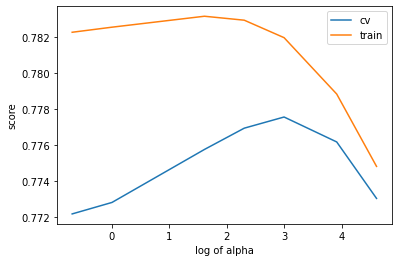

In [45]:
plt.plot(np.log(alphas),cv_scores,label="cv")
plt.plot(np.log(alphas),train_scores,label="train")
plt.legend()
plt.xlabel("log of alpha")
plt.ylabel("score")
plt.show()

In [46]:
best_score_index=np.argmax(cv_scores)
best_score_index

5

In [47]:
best_alpha=alphas[best_score_index]
best_alpha

20

In [48]:
model2 = MultinomialNB(alpha = best_alpha)
model2.fit(x_train_tf_idf,y_train)
model2.score(x_test_tf_idf,y_test)

0.7769867383752004

In [49]:
print("training score: ",model2.score(x_train_tf_idf,y_train))
print("validation score:",model2.score(x_cv_tf_idf,y_cv))
print("testing score:",model2.score(x_test_tf_idf,y_test))

training score:  0.7819709661049663
validation score: 0.7775580628901555
testing score: 0.7769867383752004


In [50]:
index.append("tfidf_multi")
train.append(model2.score(x_train_tf_idf,y_train))
cv.append(model2.score(x_cv_tf_idf,y_cv))
test.append(model2.score(x_test_tf_idf,y_test))

In [51]:

lr2 = LogisticRegression(max_iter=1000)
lr2.fit(x_train_tf_idf,y_train)
print("training score: ",lr2.score(x_train_tf_idf,y_train))
print("validation score:",lr2.score(x_cv_tf_idf,y_cv))
print("testing score:",lr2.score(x_test_tf_idf,y_test))

training score:  0.8058931878869067
validation score: 0.7967597522093276
testing score: 0.7964449158204169


In [52]:
index.append("tfidf_LR")
train.append(lr2.score(x_train_tf_idf,y_train))
cv.append(lr2.score(x_cv_tf_idf,y_cv))
test.append(lr2.score(x_test_tf_idf,y_test))

In [53]:
count_vec=CountVectorizer(ngram_range=(1,2),max_features=15000)
x_train_biagram=count_vec.fit_transform(X_train)
x_cv_biagram=count_vec.transform(X_cv)
x_test_biagram=count_vec.transform(X_test)

In [54]:
x_train_biagram.shape,x_cv_biagram.shape,x_test_biagram.shape

((782327, 15000), (335283, 15000), (478976, 15000))

In [55]:
alphas=[0,0.1,0.5,1,2,5,10,50,100]
train_biagram_scores=[]
cv_biagram_scores=[]
for a in alphas:
    model=MultinomialNB(alpha=a)
    model.fit(x_train_biagram,y_train)
    train_biagram_scores.append(model.score(x_train_biagram,y_train))
    cv_biagram_scores.append(model.score(x_cv_biagram,y_cv))
print(train_biagram_scores,cv_biagram_scores)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


[0.7876361163554371, 0.7876322816418199, 0.7876079951222443, 0.787555587369476, 0.7874801713350044, 0.7872373061392487, 0.7869151901954042, 0.7838192980684547, 0.7808742380104483] [0.7855274499452701, 0.7855035895049853, 0.7854946418398786, 0.7854260430740598, 0.7853872698585971, 0.785091996910073, 0.7849040959428304, 0.7825299821344953, 0.7801200776657331]


<ipython-input-56-b19561c0d518>:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(alphas),cv_biagram_scores,label="cv")
<ipython-input-56-b19561c0d518>:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(alphas),train_biagram_scores,label="train")


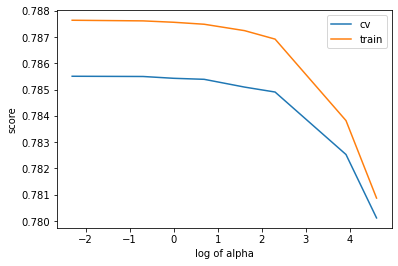

In [56]:
plt.plot(np.log(alphas),cv_biagram_scores,label="cv")
plt.plot(np.log(alphas),train_biagram_scores,label="train")
plt.legend()
plt.xlabel("log of alpha")
plt.ylabel("score")
plt.show()

In [57]:
best_biagram_cv_scores=np.argmax(cv_biagram_scores)
best_biagram_cv_scores

0

In [58]:
best_alpha_biagram_scores=alphas[best_biagram_cv_scores]
best_alpha_biagram_scores

0

In [59]:
biagram=MultinomialNB(alpha=best_alpha_biagram_scores)
biagram.fit(x_train_biagram,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


MultinomialNB(alpha=0)

In [60]:
print("testing score", biagram.score(x_test_biagram,y_test))
print("training score",biagram.score(x_train_biagram,y_train))

testing score 0.7850664751469802
training score 0.7876361163554371


In [61]:
print("training score: ",biagram.score(x_train_biagram,y_train))
print("validation score:",biagram.score(x_cv_biagram,y_cv))
print("testing score:",biagram.score(x_test_biagram,y_test))

training score:  0.7876361163554371
validation score: 0.7855274499452701
testing score: 0.7850664751469802


In [62]:
index.append("bigram_multi")
train.append(biagram.score(x_train_biagram,y_train))
cv.append(biagram.score(x_cv_biagram,y_cv))
test.append(biagram.score(x_test_biagram,y_test))

In [63]:

lr = LogisticRegression(max_iter=1000)
lr.fit(x_train_biagram,y_train)
print("training score: ",lr.score(x_train_biagram,y_train))
print("validation score:",lr.score(x_cv_biagram,y_cv))
print("testing score:",lr.score(x_test_biagram,y_test))

training score:  0.8162481928912079
validation score: 0.8061637482365643
testing score: 0.8059986304115446


In [64]:
index.append("bigram_LR")
train.append(lr.score(x_train_biagram,y_train))
cv.append(lr.score(x_cv_biagram,y_cv))
test.append(lr.score(x_test_biagram,y_test))

In [65]:
count_vec=CountVectorizer(ngram_range=(1,3),max_features=15000)
x_train_trigram=count_vec.fit_transform(X_train)
x_cv_trigram=count_vec.transform(X_cv)
x_test_trigram=count_vec.transform(X_test)

In [66]:
x_train_trigram.shape,x_cv_trigram.shape,x_test_trigram.shape

((782327, 15000), (335283, 15000), (478976, 15000))

In [67]:
alphas=[0,0.1,0.5,1,2,5,10,50,100]
train_trigram_scores=[]
cv_trigram_scores=[]
for a in alphas:
    model=MultinomialNB(alpha=a)
    model.fit(x_train_trigram,y_train)
    train_trigram_scores.append(model.score(x_train_trigram,y_train))
    cv_trigram_scores.append(model.score(x_cv_trigram,y_cv))
print(train_trigram_scores,cv_trigram_scores)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


[0.7854158171710807, 0.785417095408953, 0.7853813047485259, 0.7853314534715023, 0.7852061861600073, 0.7849556515370172, 0.784567067223808, 0.7820911204649718, 0.779503967011237] [0.7837468645890189, 0.7837259867037697, 0.7836752832681645, 0.7836514228278797, 0.7836037019473102, 0.7835052776311355, 0.783257725563181, 0.7813429252303278, 0.778870387105818]


In [68]:
best_trigram_cv_scores=np.argmax(cv_trigram_scores)
best_trigram_cv_scores

0

In [69]:
best_alpha_trigram_scores=alphas[best_trigram_cv_scores]
best_alpha_trigram_scores

0

In [70]:
trigram=MultinomialNB(alpha=best_alpha_trigram_scores)
trigram.fit(x_train_trigram,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


MultinomialNB(alpha=0)

In [71]:
print("testing score", trigram.score(x_test_trigram,y_test))
print("training score",trigram.score(x_train_trigram,y_train))

testing score 0.7826049739444148
training score 0.7854158171710807


In [72]:
print("training score: ",trigram.score(x_train_trigram,y_train))
print("validation score:",trigram.score(x_cv_trigram,y_cv))
print("testing score:",trigram.score(x_test_trigram,y_test))

training score:  0.7854158171710807
validation score: 0.7837468645890189
testing score: 0.7826049739444148


In [73]:
index.append("trigram_multi")
train.append(trigram.score(x_train_trigram,y_train))
cv.append(trigram.score(x_cv_trigram,y_cv))
test.append(trigram.score(x_test_trigram,y_test))

In [74]:

lr = LogisticRegression(max_iter=1000)
lr.fit(x_train_trigram,y_train)
print("training score: ",lr.score(x_train_trigram,y_train))
print("validation score:",lr.score(x_cv_trigram,y_cv))
print("testing score:",lr.score(x_test_trigram,y_test))

training score:  0.8161957851384396
validation score: 0.8060384809250692
testing score: 0.806023683858899


In [75]:
index.append("trigram_LR")
train.append(lr.score(x_train_trigram,y_train))
cv.append(lr.score(x_cv_trigram,y_cv))
test.append(lr.score(x_test_trigram,y_test))

In [76]:
df=pd.DataFrame({"train":train,"CV":cv,"test":test}, index=index, columns=col)

In [77]:
df

,train,CV,test
count_multi,0.766185,0.761163,0.760303
count_LR,0.778457,0.767119,0.767372
tfidf_multi,0.781971,0.777558,0.776987
tfidf_LR,0.805893,0.796760,0.796445
bigram_multi,0.787636,0.785527,0.785066
bigram_LR,0.816248,0.806164,0.805999
trigram_multi,0.785416,0.783747,0.782605
trigram_LR,0.816196,0.806038,0.806024


In [78]:
import pickle

In [79]:
with open("sentiment_model.pkl", "wb") as f:
    pickle.dump(lr,f)